# Data Preprocessing Tools

## Importing the libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Importing the dataset

In [33]:
df = pd.read_csv('../data/train_set.csv')

print(df.info())
print(df.columns)
print(df.isnull().sum())
print(df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23040 entries, 0 to 23039
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      23040 non-null  int64  
 1   dri_score               22912 non-null  object 
 2   psych_disturb           21367 non-null  object 
 3   cyto_score              16617 non-null  object 
 4   diabetes                21308 non-null  object 
 5   hla_match_c_high        19370 non-null  float64
 6   hla_high_res_8          18404 non-null  float64
 7   tbi_status              23040 non-null  object 
 8   arrhythmia              21247 non-null  object 
 9   hla_low_res_6           20462 non-null  float64
 10  graft_type              23040 non-null  object 
 11  vent_hist               22848 non-null  object 
 12  renal_issue             21482 non-null  object 
 13  pulm_severe             21316 non-null  object 
 14  prim_disease_hct        23040 non-null

Index(['hla_match_drb1_low', 'comorbidity_score', 'karnofsky_score',
       'hla_match_drb1_high', 'hla_high_res_8', 'hla_low_res_6',
       'hla_high_res_6', 'hla_high_res_10', 'hla_low_res_8', 'hla_low_res_10'],
      dtype='object')


/home/yang/anaconda3/envs/erdos_ds/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/yang/anaconda3/envs/erdos_ds/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


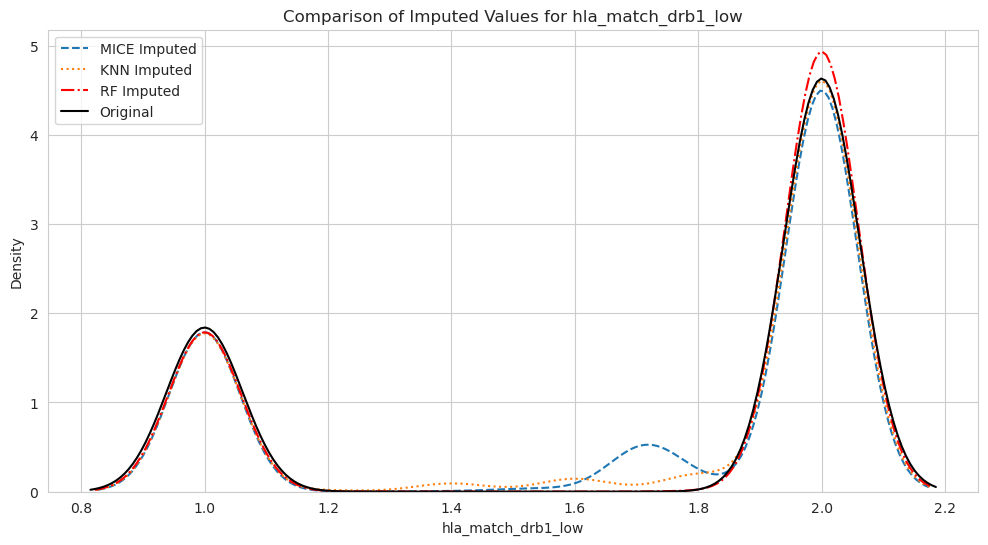

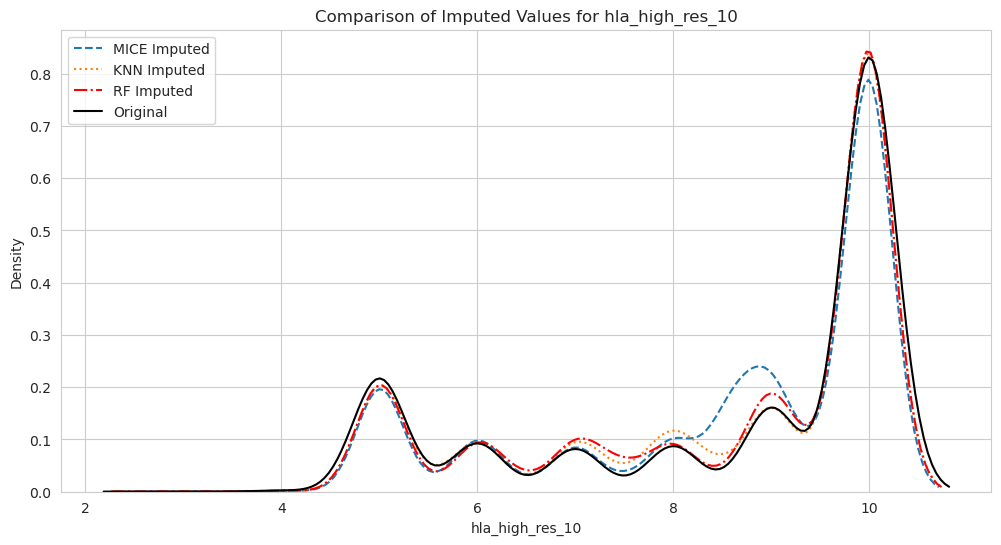

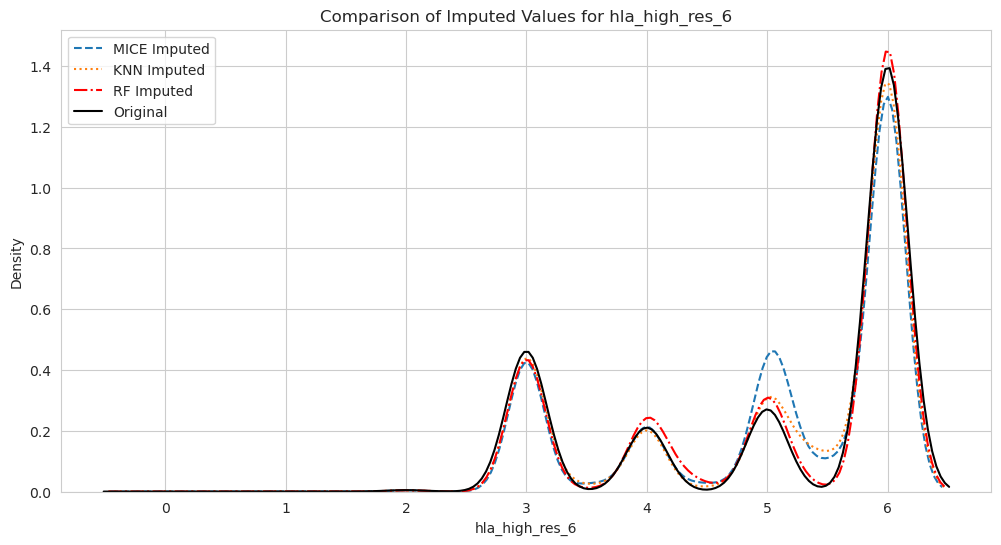

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

# Define the columns for imputation
predictive_features = [
    "hla_match_drb1_low", "comorbidity_score", "karnofsky_score",
    "hla_match_drb1_high"
] + [col for col in df.columns if col.startswith(("hla_low_res", "hla_high_res"))]

# Extract only the columns to be imputed
df_subset = df[predictive_features]
print(df_subset.columns)

# Define different imputers
# 1. knn imputer
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_subset), columns=predictive_features)

# 2. MICE imputer
mice_imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_subset), columns=predictive_features)

# 3.Random forest imputer
rf_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42), max_iter=10, random_state=42)
df_rf_imputed = pd.DataFrame(rf_imputer.fit_transform(df_subset), columns=predictive_features)

# Add the imputed data back to the original dataset (if needed)
df_knn = df.copy()
df_knn[predictive_features] = df_knn_imputed

df_mice = df.copy()
df_mice[predictive_features] = df_mice_imputed

df_rf = df.copy()
df_rf[predictive_features] = df_rf_imputed

# Save the imputed datasets
# df_knn.to_csv("imputed_knn.csv", index=False)
# df_mice.to_csv("imputed_mice.csv", index=False)
# df_rf.to_csv("imputed_rf.csv", index=False)
print("Imputation completed and saved.")

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df_original = df.copy()
# Internal consistency check
def check_imputation_stats(df, method_name):
    print(f"\nStatistics for {method_name} Imputation:")
    print(df[target_features].describe())

# check_imputation_stats(df_mice, "MICE")
# check_imputation_stats(df_knn, "KNN")
# check_imputation_stats(df_rf, "RF")

#Visualize distributions before and after imputation
def plot_distributions(feature):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df_mice[feature], label="MICE Imputed", linestyle="dashed")
    sns.kdeplot(df_knn[feature], label="KNN Imputed", linestyle="dotted")
    sns.kdeplot(df_rf[feature], label="RF Imputed", linestyle="dashdot", color='red')

    # if feature in df_original.columns:
        # sns.kdeplot(df_original[feature].dropna(), label="Original", color="black")
    sns.kdeplot(df_original[feature].dropna(), label="Original", color="black")

    plt.legend()
    plt.title(f"Comparison of Imputed Values for {feature}")
    plt.show()

pd.DataFrame(df_knn.isna().sum()/df_knn.shape[0] * 100).reset_index().rename(columns={"index":"Feature", 0:"Percent Missing"}).sort_values(by="Percent Missing", ascending=False)

# plot_distributions("hla_match_drb1_low")
# plot_distributions("hla_high_res_10")
# plot_distributions("hla_high_res_6")
